## Explorating the Tree of Life

<table><tr><td>
<img src="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391" width=200><a href="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391">source</a></td><td><img src="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png" width=300><a href="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png">source</a></td></tr></table>

In this hands-on exercise, you answer the following questions by using pandas data structures and methods to analyze the eukaryote genome data store in the following tab-delimited file. https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv

In [ ]:
import pandas as pd
%matplotlib inline

# this input file is tab-delimited instead of comma-delimited
tsvFile = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv"
# Load the csv file into a dataframe
euk = pd.read_csv(tsvFile, sep="\t")
euk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8302 entries, 0 to 8301
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Species             8302 non-null   object 
 1   Kingdom             8302 non-null   object 
 2   Class               8302 non-null   object 
 3   Size (Mb)           8302 non-null   float64
 4   GC%                 8302 non-null   object 
 5   Number of genes     8302 non-null   object 
 6   Number of proteins  8302 non-null   object 
 7   Publication year    8302 non-null   int64  
 8   Assembly status     8302 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 583.9+ KB


## Q1. How many Mammals have at least 20,000 genes? What are their scientific names?
*Note:*
- *Mammals are under Class*
- *Scientific names are under Species*


In [ ]:
# Your code here . . .
def toInt(str):
  if(str == '-'):
    return -1
  else:
    return int(str)

euk['Number of genes'] =euk['Number of genes'].map(toInt)

mammals_20000 = euk[(euk.Class == 'Mammals') & (euk['Number of genes'] >= 20000)]
print(len(mammals_20000), 'Mammals w at least 20k genes')

134 Mammals w at least 20k genes


In [ ]:
# Hannah added
mammals_20000.size # called directly on a dataframe, it is multiplying rows*columns

1206

In [ ]:
# Hannah added
# mammals_20000.size()
# does not work

In [ ]:
# Hannah added
mammals_20000.groupby("Class").size() # As an aggregate function, it tells us the number of rows

Class
Mammals    134
dtype: int64

In [ ]:
# Hannah added
mammals_20000.groupby("Class").size # provides documentation

<bound method GroupBy.size of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7ccf746ed090>>

### Q2. Animals are a part of Kingdom. How many records are there for each Class of Animals?

In [ ]:
# Your code here . . .
euk[(euk.Kingdom == 'Animals')].Class.value_counts()

Mammals          658
Insects          602
Fishes           282
Other Animals    210
Birds            172
Roundworms       162
Flatworms         47
Reptiles          41
Amphibians         7
Name: Class, dtype: int64

### Q3. Animals are a part of Kingdom. How many unique Species are there for each Class of Animals?

In [ ]:
# Your code here . . .
for cls in euk[(euk.Kingdom == 'Animals')].Class.unique():
  print(cls, euk[(euk.Kingdom == 'Animals') & (euk.Class == cls)].Species.unique().size)

Roundworms 116
Insects 402
Fishes 218
Other Animals 171
Mammals 313
Amphibians 6
Birds 144
Flatworms 34
Reptiles 38


### Q4. What are the unique scientific names of Mammals with the genus name Macaca?
*Recall: the scientific name starts with genus followed by a space and then the species name. Example: Homo sapiens.*

In [ ]:
# Your code here . . .
mammals = euk[euk.Class == 'Mammals']

mammals[mammals.Species.str.contains('Macaca')].Species.unique()

array(['Macaca mulatta', 'Macaca fascicularis', 'Macaca nemestrina',
       'Macaca fuscata fuscata'], dtype=object)

### Q5. Modify the Species names to only contain the scientific names  and create a new dataframe.

Some of the names in the Species column have more than two parts, such as `Emiliania huxleyi CCMP1516`. Create a new column `Species` that contains only the first two parts of name, such as `Emiliania huxleyi`. Combine this new Species column with `Kingdom`, `Class`, `Size (Mb)`, `Number of genes`, and `Number of proteins` and store this new dataframe as `df_species`.

Hint: Follow Q3 in Lecture 4 with a little twist. Instead of just getting the first element from the split results, you will get the first two elements using `.str[0:2]` which will give you a list. You can then use `.str.join(" ")` to change it back to a string.

In [ ]:
# Your code here . . .
df_species = euk
df_species['Species'] = df_species['Species'].apply(lambda x: ' '.join(x.split(' ')[0:2]))
df_species

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
0,Emiliania huxleyi,Protists,Other Protists,167.676000,64.5,38549,38554,2013,Scaffold
1,Arabidopsis thaliana,Plants,Land Plants,119.669000,36.0529,38311,48265,2001,Chromosome
2,Glycine max,Plants,Land Plants,979.046000,35.1153,59847,71219,2010,Chromosome
3,Medicago truncatula,Plants,Land Plants,412.924000,34.047,37603,41939,2011,Chromosome
4,Solanum lycopersicum,Plants,Land Plants,828.349000,35.6991,31200,37660,2010,Chromosome
...,...,...,...,...,...,...,...,...,...
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,38.2,-1,-,2017,Scaffold
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,38.5921,155,298,1992,Chromosome
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,38.2971,-1,-,2018,Chromosome
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,38.2413,-1,-,2018,Chromosome


### Q6. Create a pie plot using pandas to show the number of unique Species in each Class of Animals using the new dataframe you created in Q5
Hint: First, create a new dataframe that contains the number of unique Species and the index is the corresponding Animals Class. Then, use that dataframe to plot the pie plot.
[Check out this documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html)

In [ ]:
# Create a new dataframe that contains the number of unique Species and
# the index is the corresponding Animals Class.

uniqueSpeciesDf = euk[euk.Kingdom == 'Animals'].groupby('Class')['Species'].nunique().reset_index(name = 'Unique Species Count')
uniqueSpeciesDf.set_index('Class', inplace=True)
uniqueSpeciesDf

,Unique Species Count
Class,
Amphibians,6
Birds,140
Fishes,217
Flatworms,34
Insects,360
Mammals,296
Other Animals,169
Reptiles,38
Roundworms,111


<Axes: >

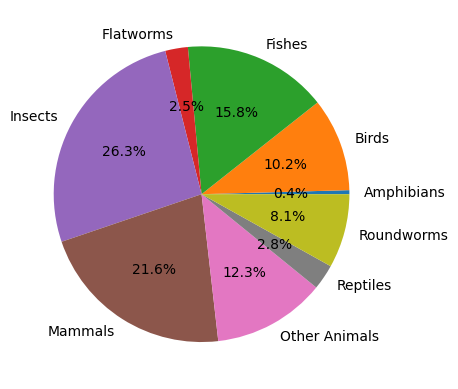

In [ ]:
# Create a panda pie plot using the dataframe above

uniqueSpeciesDf['Unique Species Count'].plot.pie(autopct='%1.1f%%', ylabel='')